<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time Series Analysis</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

In [2]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,sklearn,matplotlib

Ethen 2018-07-04 11:04:34 

CPython 3.6.4
IPython 6.4.0

numpy 1.14.5
pandas 0.23.0
sklearn 0.19.1
matplotlib 2.2.2


# Time Series Analysis

- https://machinelearningmastery.com/time-series-seasonality-with-python/
- https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
- https://machinelearningmastery.com/time-series-forecasting-python-mini-course/
- https://machinelearningmastery.com/blog/page/20/

The gist behind time series analysis is that we are given some quantitative measures about the past and we wish to use these informations to predict the future to enable better planning, decision-making and so on. The main difference between time series problem and traditional prediction problems is that: in traditional prediction problems such as image classification, the data points there are assumed to be independent of one another. Whereas, time series analysis' data points have a temporal nature in them, i.e. The time dimension adds an explicit ordering to our data points that should be preserved because they can provide additional/important information to the learning algorithms.

In [23]:
input_path = 'perrin-freres-monthly-champagne-.csv'
series = pd.read_csv(input_path, header=0)
series = series.iloc[:-1]
print(series.shape)
series.head()

(105, 2)


,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [24]:
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 93, Validation 12


In [19]:
# https://machinelearningmastery.com/load-explore-time-series-data-python/
input_path = 'daily-total-female-births-in-cal.csv'
date_col = 'Date'
label_col = 'birth'
series = pd.read_csv(input_path, header=0, parse_dates=[date_col],
                     index_col=date_col, names=[date_col, label_col])
series = series.iloc[:-1]
print(series.shape)
series.head()

(365, 1)


,birth
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


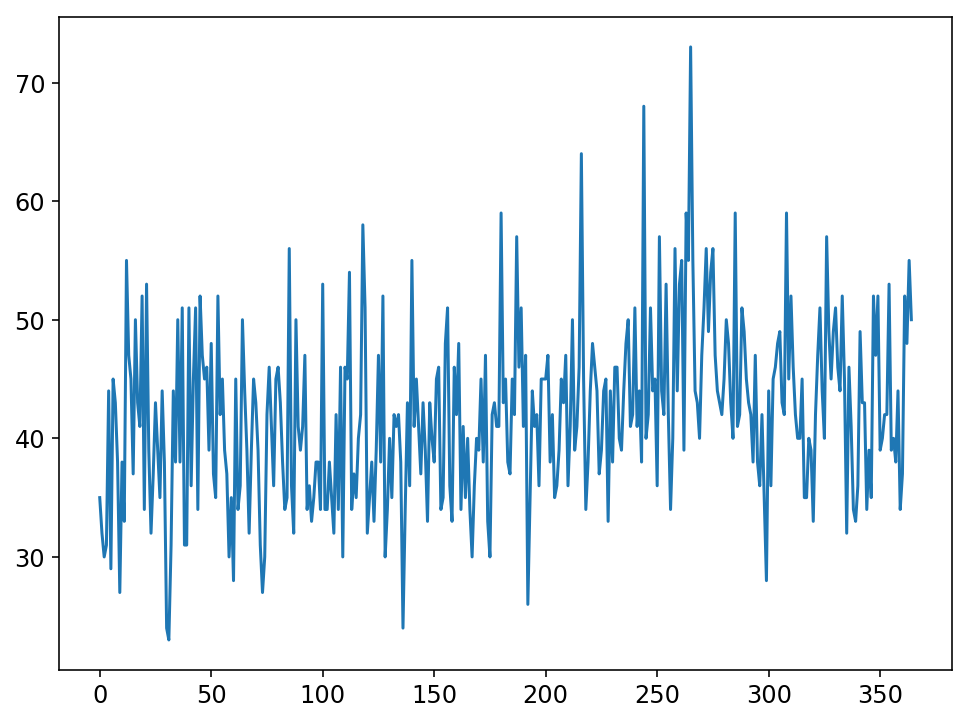

In [21]:
# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

plt.plot(series[label_col].values)
plt.show()

In [22]:
series[label_col].describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: birth, dtype: float64

Framing time series as supervised learning methods. https://machinelearningmastery.com/time-series-forecasting-supervised-learning/

# Reference

- [Blog: Time Series Forecasting with Python 7-Day Mini-Course](https://machinelearningmastery.com/time-series-forecasting-python-mini-course/)